In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [135]:
df = pd.read_csv('UNdata_Export_20200328_165559373.csv')

dx = pd.read_csv('DCIS_MORTALITA1_30032020171934872.csv')
dy = pd.read_csv('yearly_mortality.csv')


In [18]:
month_dict = dict({'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05',
                 'June': '06', 'July': '07', 'August': '08', 'September': '09', 'October': '10',
                 'November': '11', 'December': '12'})

In [139]:
df['month_number'] = df['Month'].map(month_dict)
df['year_month'] = df.Year + '-'+ df.month_number
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

df = df[(df.Month != 'Total') & (df.Month != 'Unknown')]
df.shape

(996, 11)

In [121]:
country_list = ['Belgium', 'Canada', 'France', 'Germany', 'Greece', 'Iceland',
       'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy',
       'Netherlands', 'Spain',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America']

for i,v in enumerate(country_list):
    print(v, df[df.Country == v].Month.unique())

Belgium ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Canada ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
France ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Germany ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Greece ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December' 'Unknown']
Iceland ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December' 'Unknown']
Iran (Islamic Republic of) ['January' 'February' 'March' 'April' 'September' 'October' 'November'
 'May' 'June' 'July' 'August' 'December']
Ireland ['January - March' 'April - June' 'July - September' 'October - December'
 'January' 'February' 'March' 'Apri

In [130]:
df.groupby('Month')['Value'].mean().sort_values(ascending=False)

Month
October - December    77678.000000
July - September      70647.500000
January - March       68424.000000
April - June          53781.666667
January               42548.662651
March                 40003.180723
December              39360.730769
February              38515.120482
November              36068.000000
April                 36062.780488
May                   35459.691358
October               35300.864198
July                  34694.333333
August                34199.456790
June                  33531.703704
September             33120.243902
Name: Value, dtype: float64

In [137]:
df[df.Country == 'Italy'].groupby('Month')['Value'].mean().sort_values(ascending = False)

Month
Total        625104.0
January       63452.2
February      58172.0
March         57696.8
December      53542.8
May           50596.2
October       50425.6
April         49846.4
August        49838.8
November      49750.0
July          49308.4
June          46824.4
September     45650.4
Unknown           0.0
Name: Value, dtype: float64

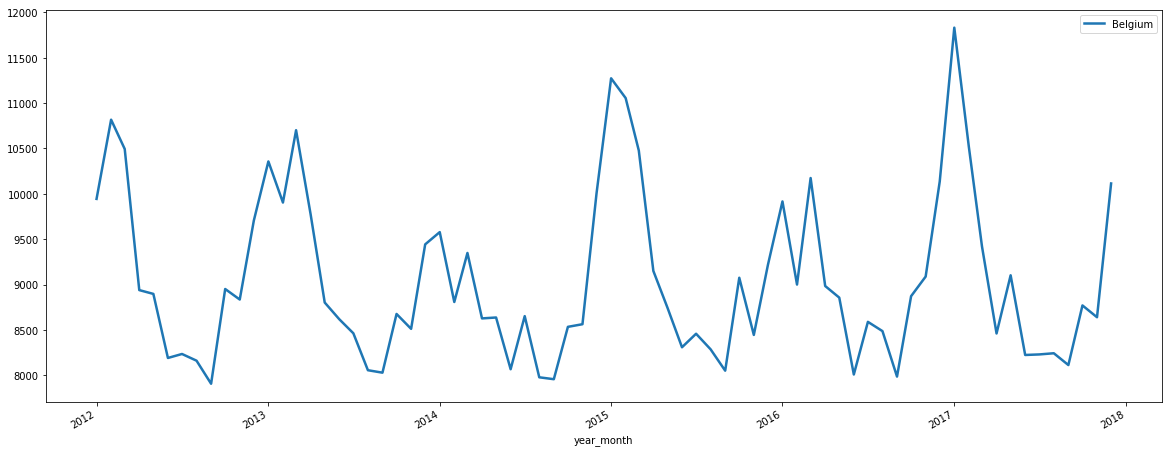

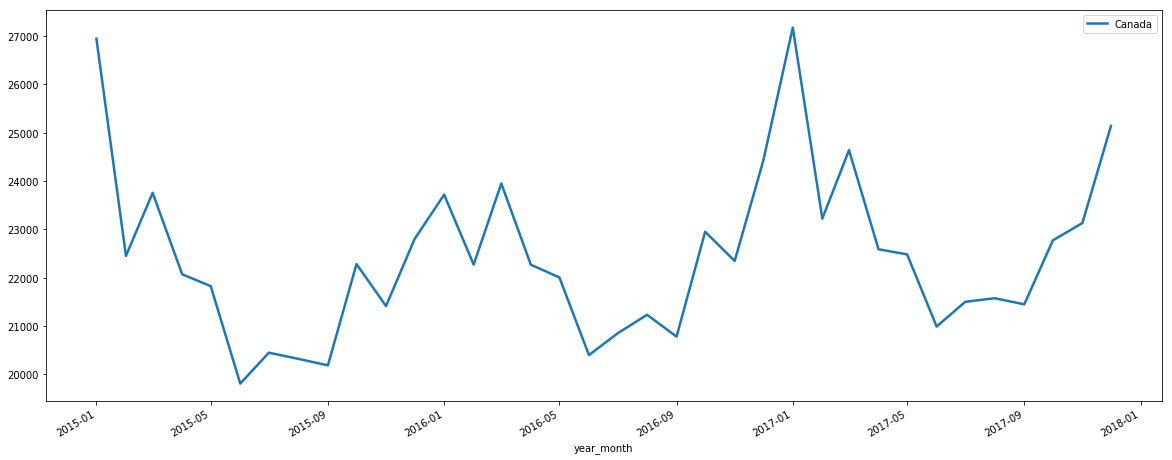

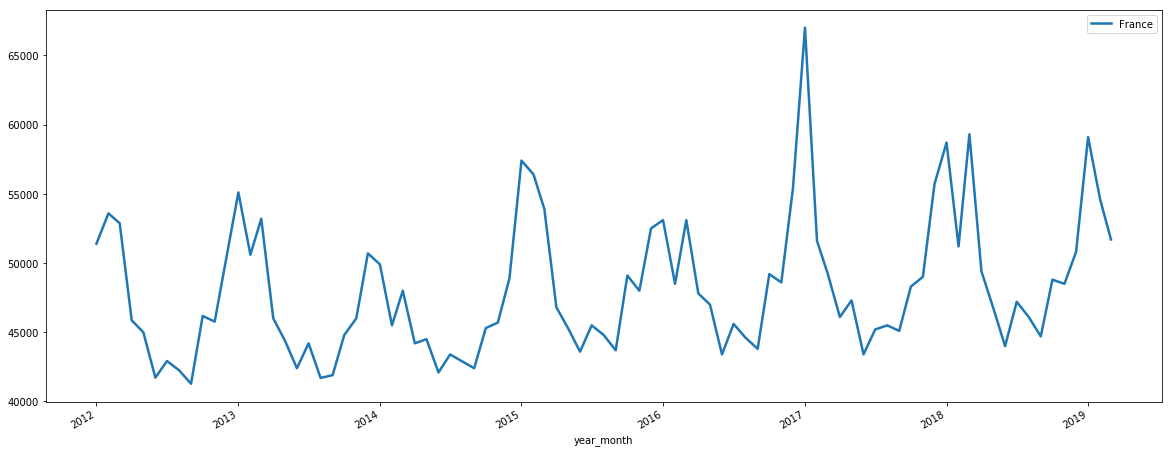

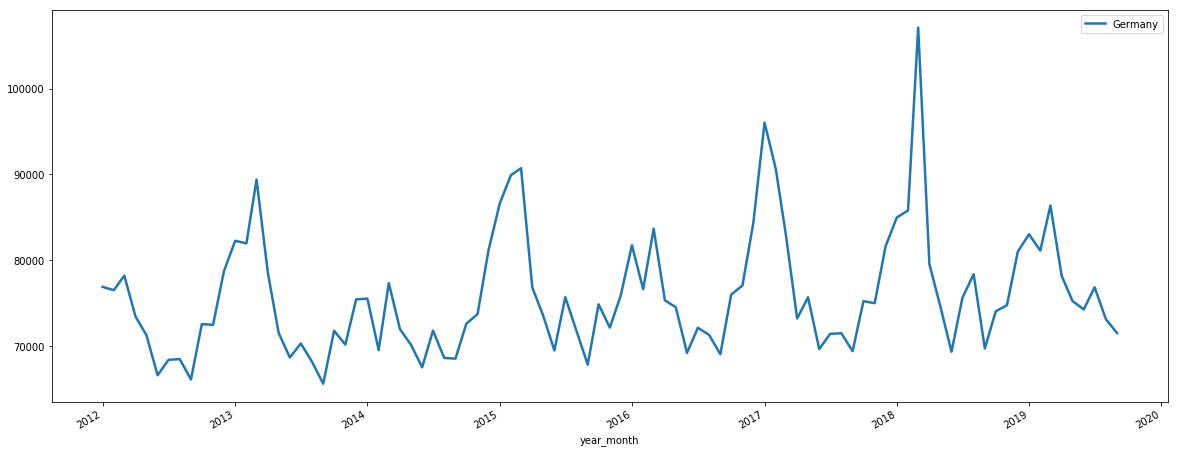

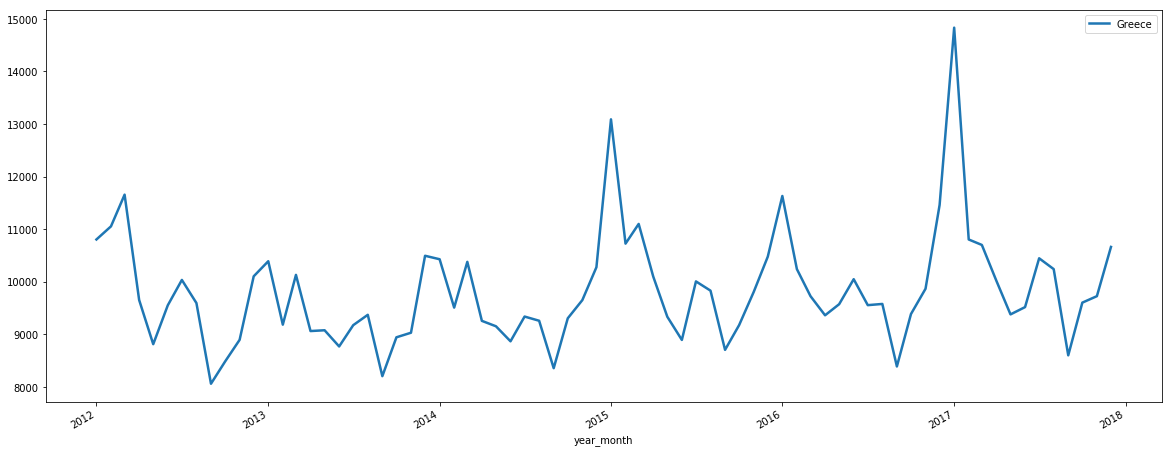

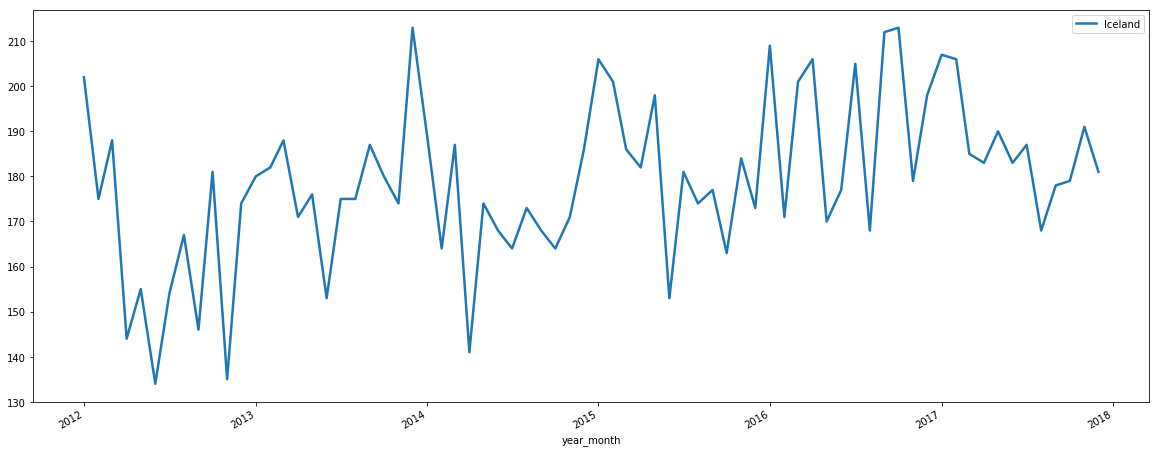

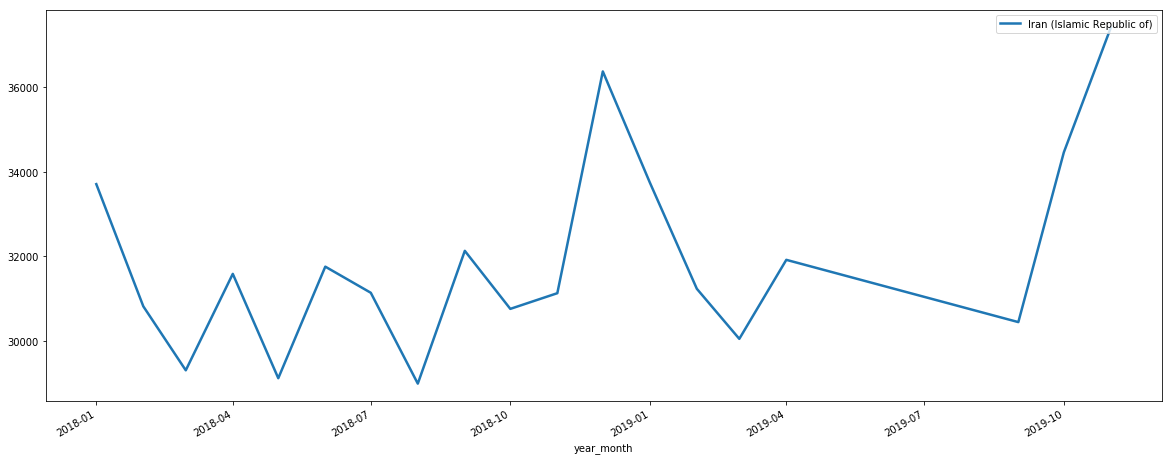

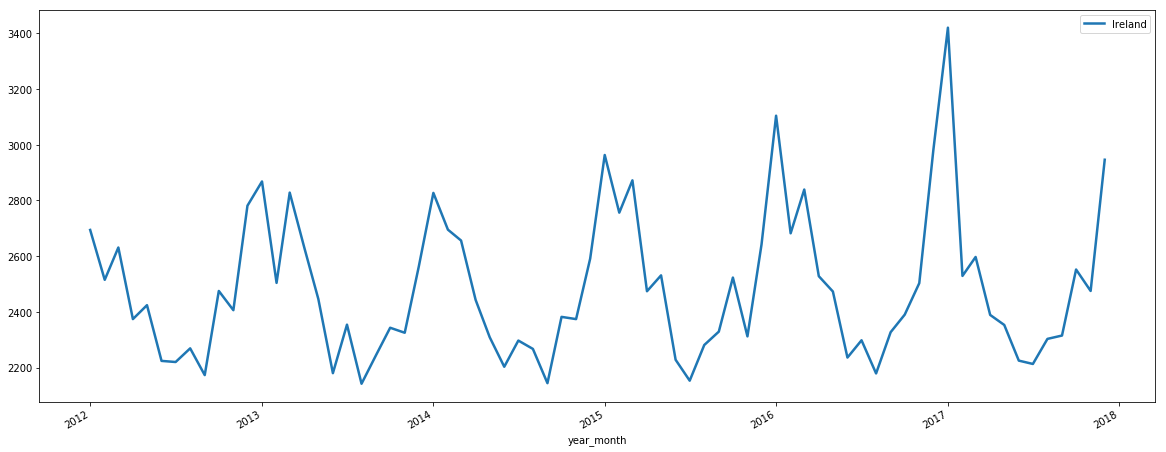

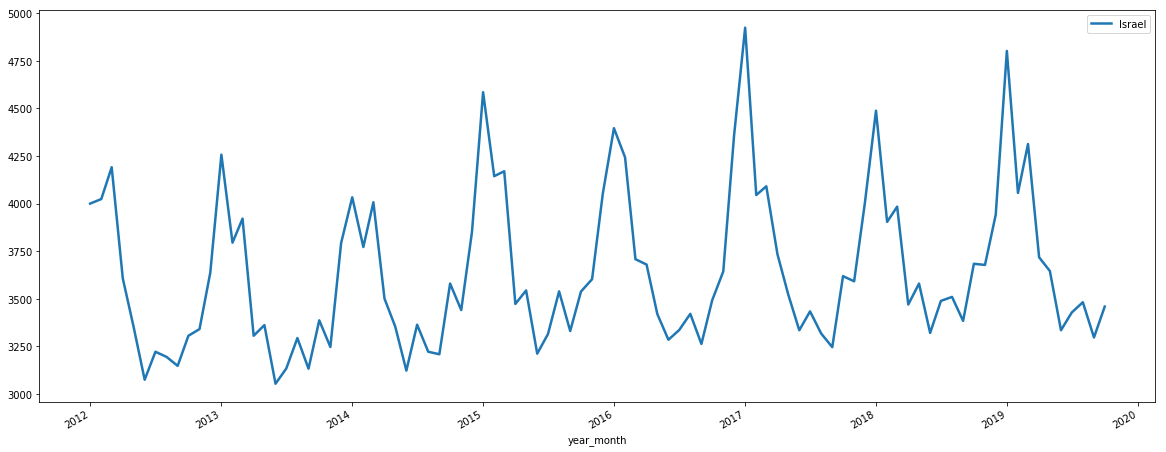

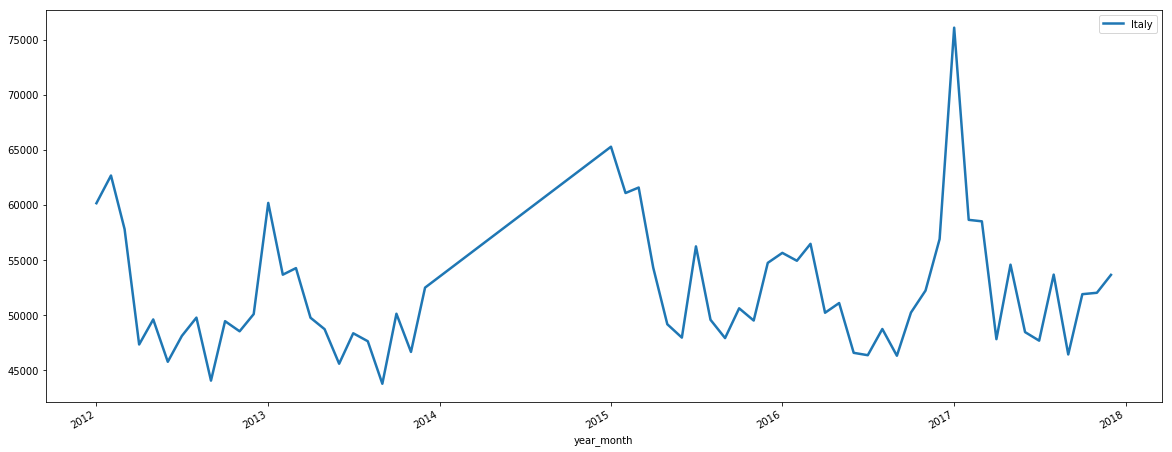

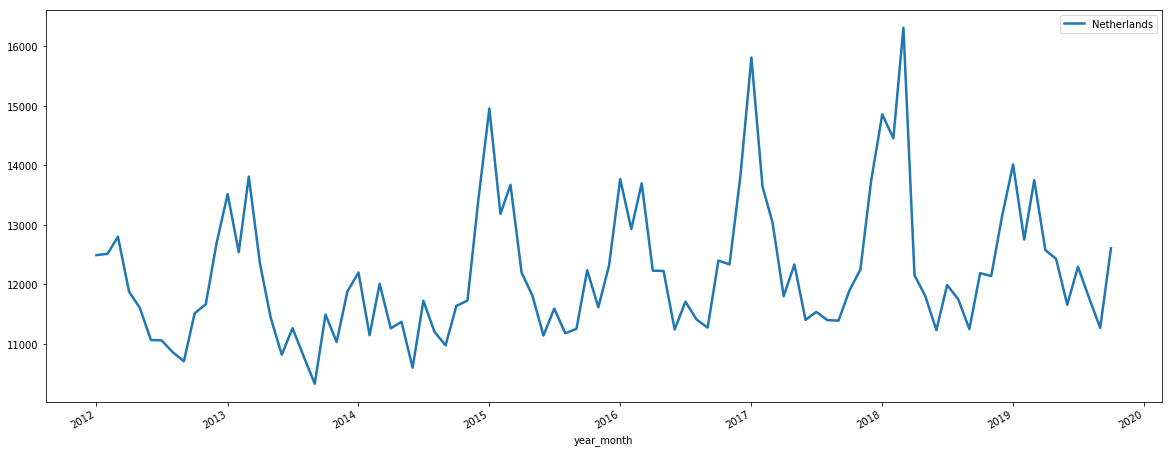

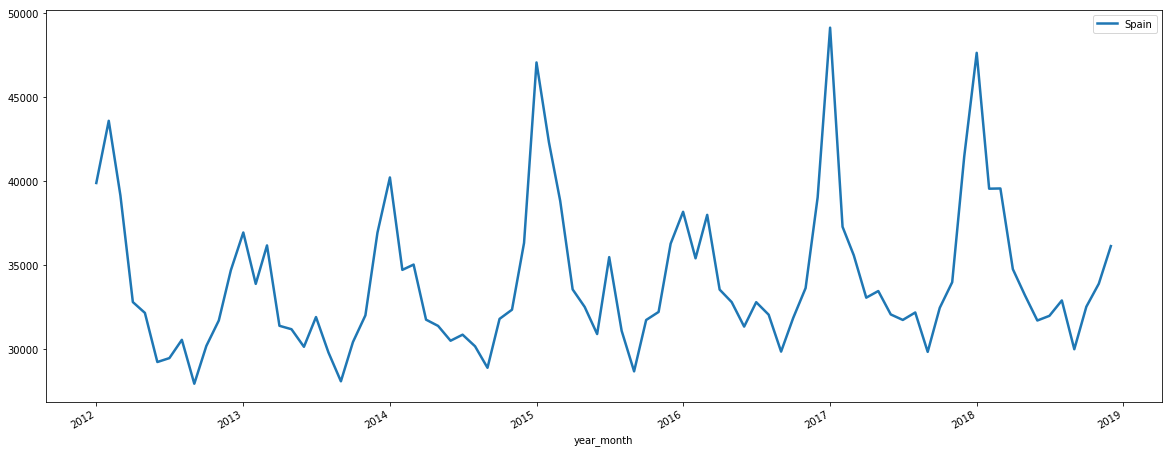

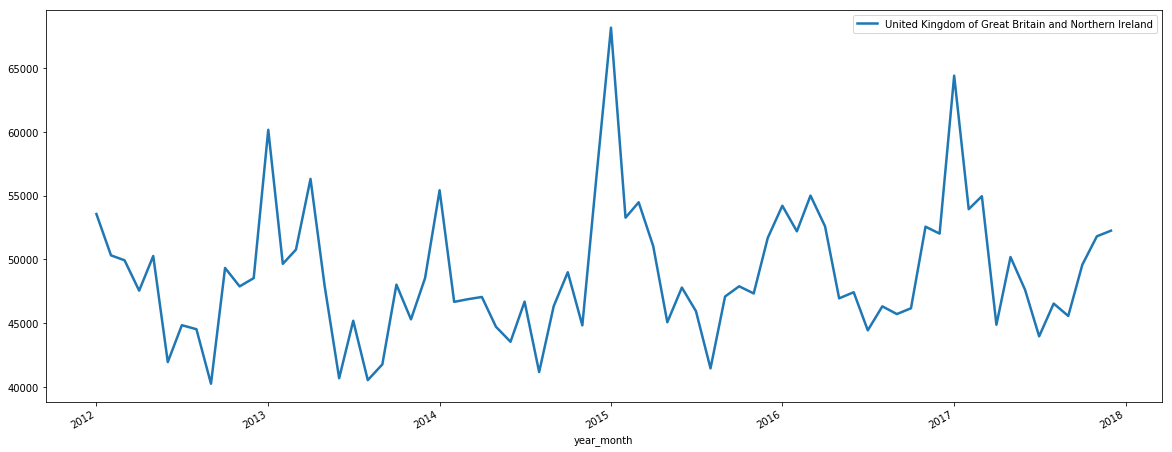

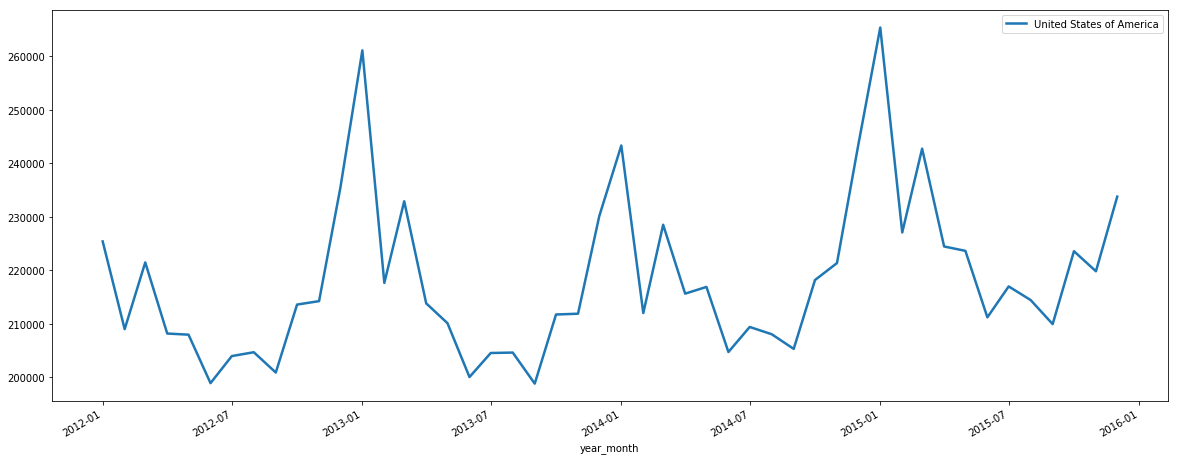

In [112]:
#Plot time-series of mortality
for i,v in enumerate(country_list):
    fig, ax = plt.subplots(figsize=(20,8)) 
    ax = df[df.Country == v].plot(x = 'year_month', y=['Value'],linewidth=2.5, ax = ax, label = df[df.Country == v].Country.unique())
    ax.legend(loc = 1)
    plt.show()

In [145]:
df[df.Country == 'Italy'].year_month.max()

Timestamp('2017-12-01 00:00:00')

In [151]:
bigger = '2015-01-01'
smaller = '2017-12-01'

df_filter = df[(df.year_month >= bigger) & (df.year_month <= smaller)]
df_filter.year_month.unique()

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01

In [161]:
country_list2 = ['Belgium', 'Canada', 'France', 'Germany', 'Greece', 'Iceland',
         'Ireland', 'Israel',
       'Netherlands', 'Spain']
       #'United Kingdom of Great Britain and Northern Ireland',
       #'United States of America']

for i,v in enumerate(country_list2):
    print(v, np.corrcoef(df_filter[df_filter.Country == 'Italy'].Value, df_filter[df_filter.Country == v].Value)[0][1])

Belgium 0.8982067354243698
Canada 0.802774106869451
France 0.8881540764018669
Germany 0.9074982235116614
Greece 0.8763558436221018
Iceland 0.3406898422550874
Ireland 0.7962397164964722
Israel 0.8462488606113778
Netherlands 0.8869237576785542
Spain 0.9076845742631978


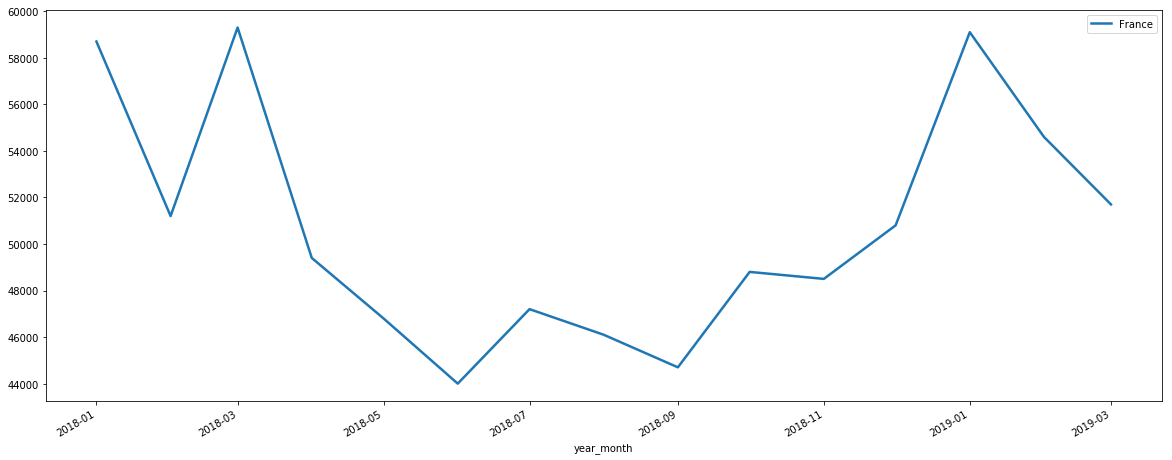

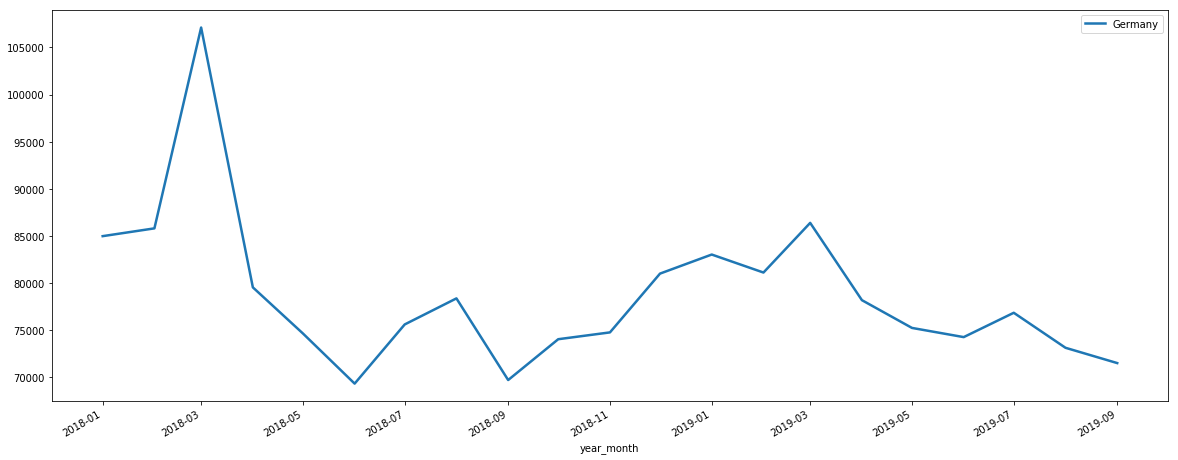

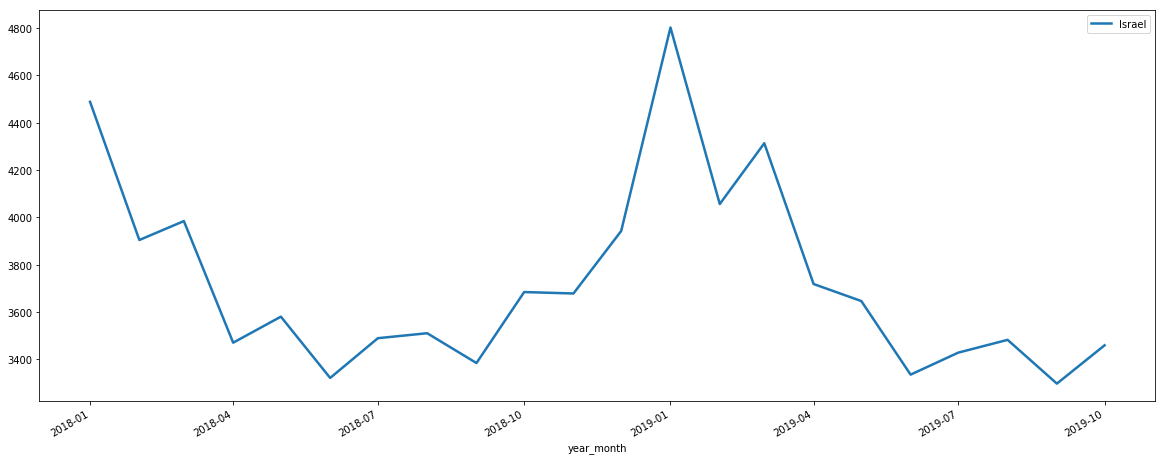

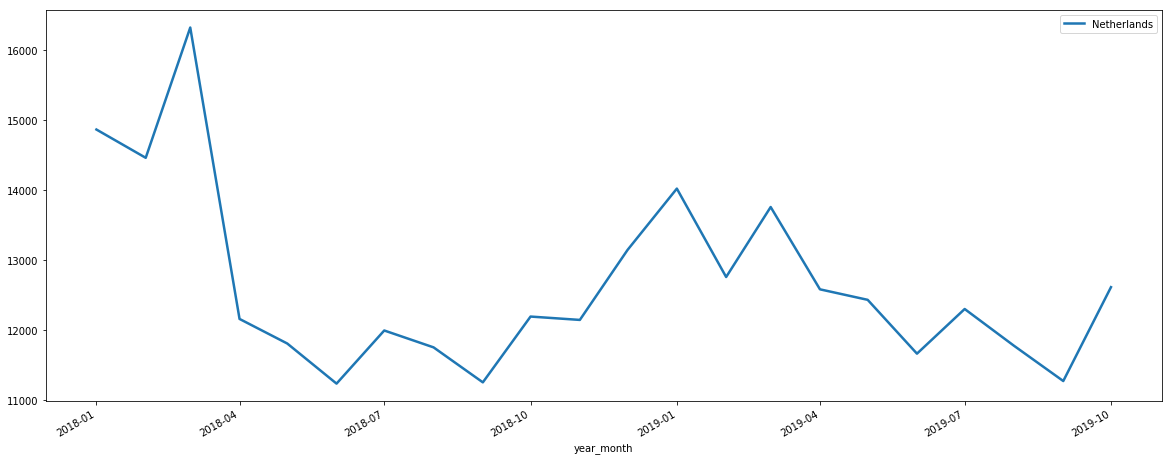

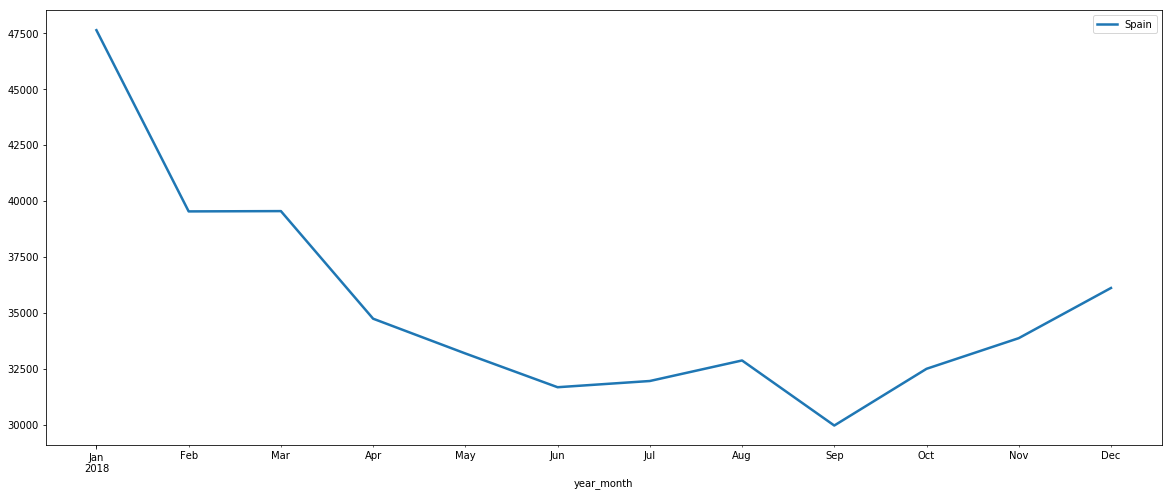

In [167]:
#df[df.year_month > '2017-12-01'].Country.unique()
country_list3 = ['France', 'Germany',  'Israel',
       'Netherlands', 'Spain']

for i,v in enumerate(country_list3):
    fig, ax = plt.subplots(figsize=(20,8)) 
    ax = df[(df.Country == v) & (df.year_month > '2017-12-01')].plot(x = 'year_month', y=['Value'],linewidth=2.5, ax = ax, label = df[df.Country == v].Country.unique())
    ax.legend(loc = 1)
    plt.show()

In [136]:
#Get correlation between countries
corr =  df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Source Year,Value
Source Year,1,-0.0464946
Value,-0.0464946,1
